This is the notebook of kaggle competition "House Prices - Advanced Regression Techniques"

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [22]:
import pandas as pd

def load_housing_data(housing_path='data'):
    train_csv_path = os.path.join(housing_path, "train.csv")
    test_csv_path = os.path.join(housing_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_housing_data()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

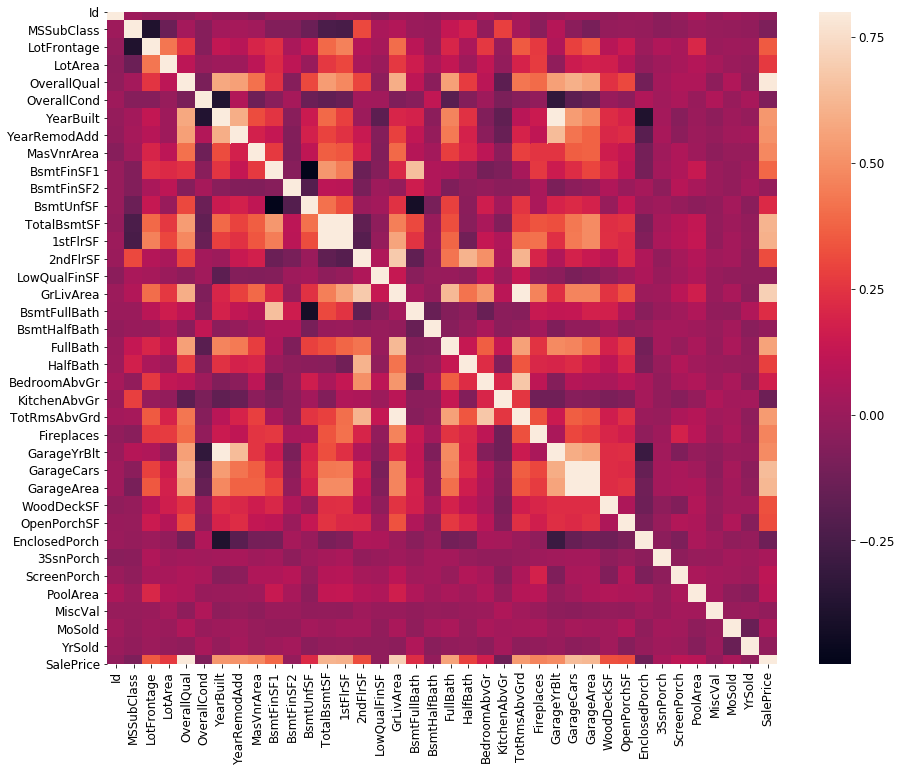

In [7]:
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

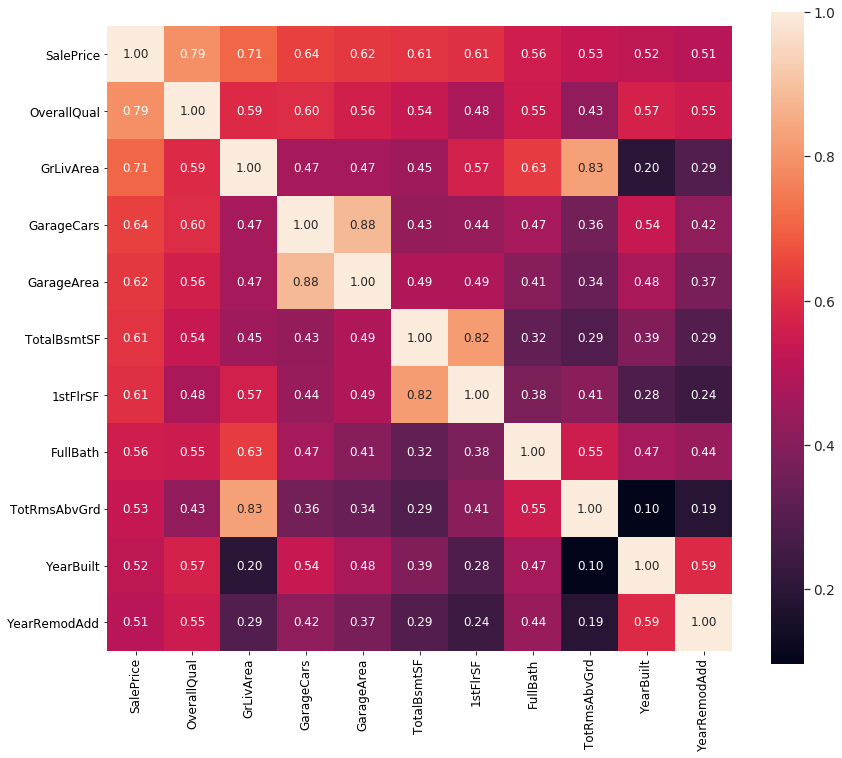

In [8]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
f, ax = plt.subplots(figsize=(14, 12))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

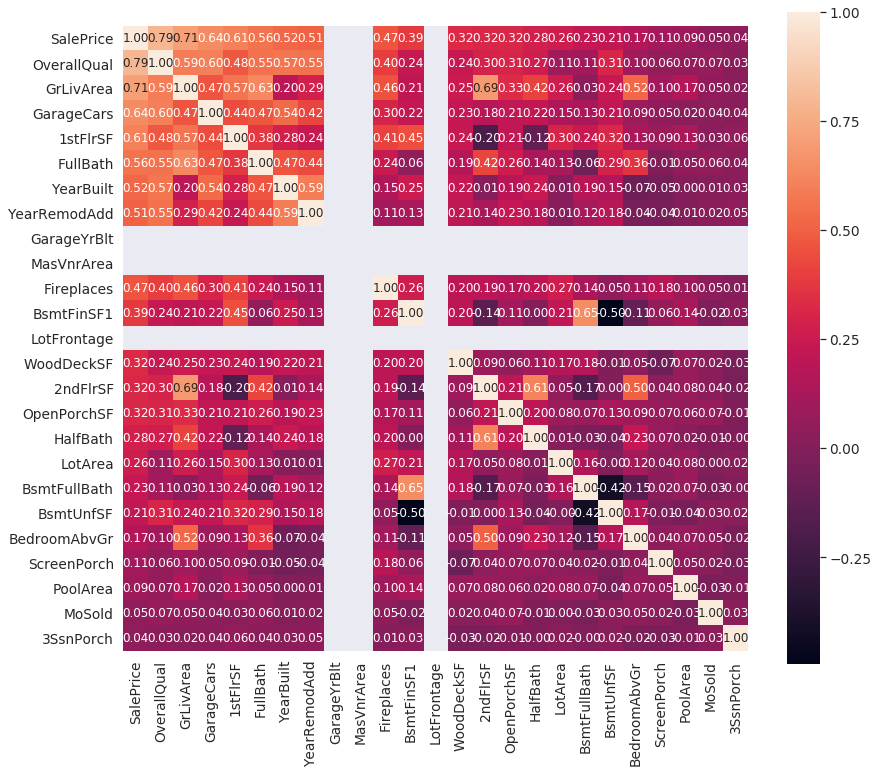

In [9]:
num_att = list(train.select_dtypes([np.number]).columns)
num_att.remove('GarageArea')
num_att.remove('TotalBsmtSF')
num_att.remove('TotRmsAbvGrd')
corrmat = train[num_att].corr()
#saleprice correlation matrix
k = 25 #number of variables for heatmap
f, ax = plt.subplots(figsize=(14, 12))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [4]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

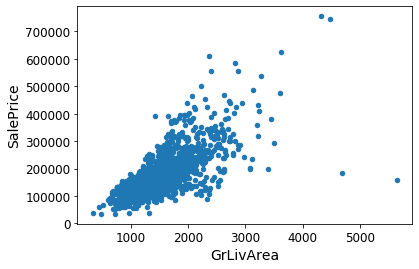

In [8]:
train.plot(kind="scatter", y="SalePrice", x="GrLivArea")

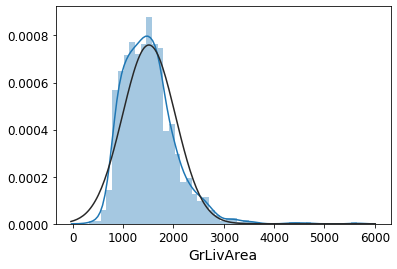

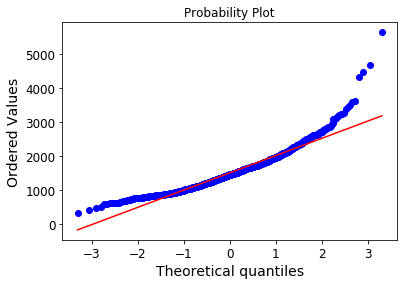

In [9]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

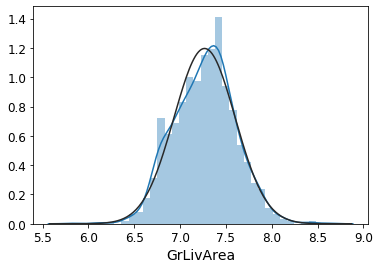

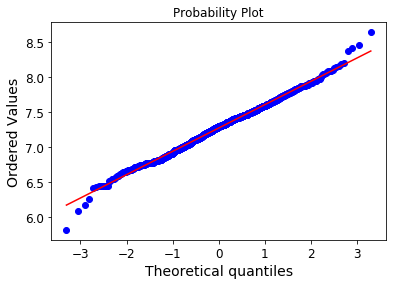

In [24]:
train['GrLivArea'] = np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

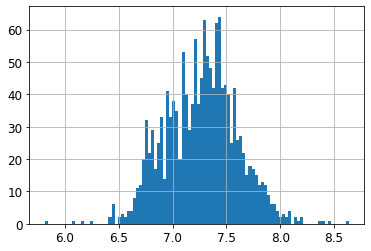

In [25]:
train['GrLivArea'].hist(bins=100)

(1460,)
(1460, 1)


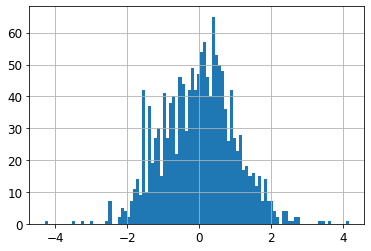

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
print(train['GrLivArea'].shape)
temp = pt.fit_transform(np.array(train['GrLivArea']).reshape(-1, 1))
print(temp.shape)
train['GrLivArea'] = temp
train['GrLivArea'].hist(bins=100)
# sns.distplot(temp, fit=norm);
# fig = plt.figure()
# res = stats.probplot(temp, plot=plt)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


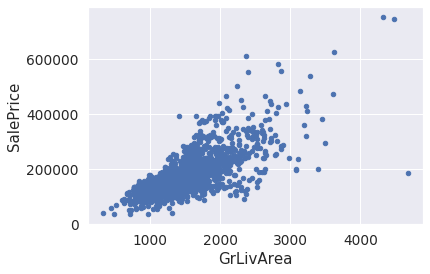

In [46]:
train.plot(kind="scatter", y="SalePrice", x="GrLivArea")

In [47]:
train['GrLivArea'][train['GrLivArea'] > 4500].index

Int64Index([523], dtype='int64')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


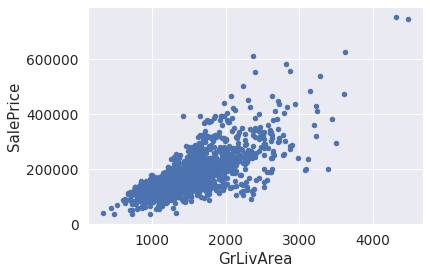

In [48]:
train = train.drop((train[train['GrLivArea'] > 4500]).index)
train.plot(kind="scatter", y="SalePrice", x="GrLivArea")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


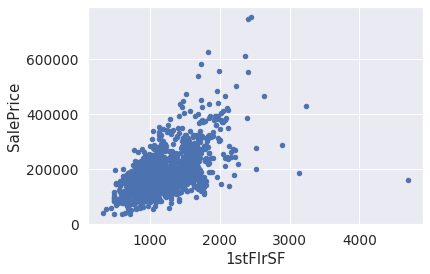

In [38]:
train.plot(kind="scatter", y="SalePrice", x="1stFlrSF")

In [42]:
train['1stFlrSF'][train['1stFlrSF'] > 4000].index

Int64Index([1298], dtype='int64')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


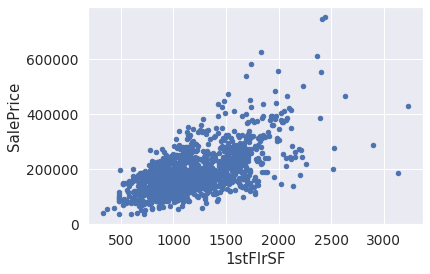

In [43]:
train = train.drop((train[train['1stFlrSF'] > 4000]).index)
train.plot(kind="scatter", y="SalePrice", x="1stFlrSF")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


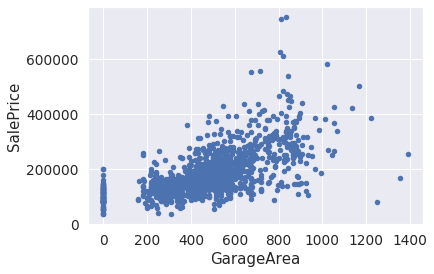

In [88]:
train.plot(kind="scatter", y="SalePrice", x="GarageArea")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


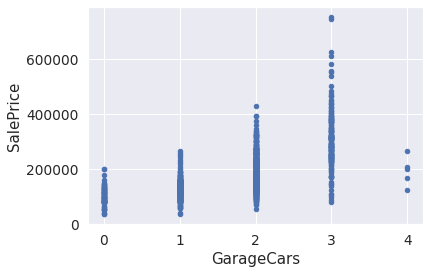

In [52]:
train.plot(kind="scatter", y="SalePrice", x="GarageCars")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


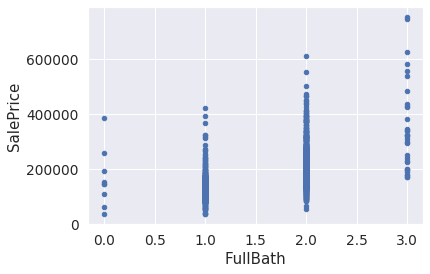

In [53]:
train.plot(kind="scatter", y="SalePrice", x="FullBath")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


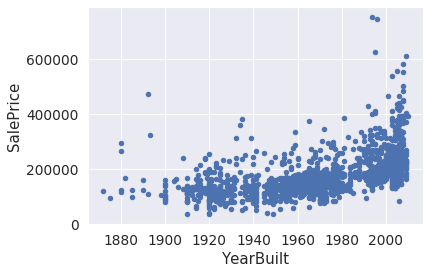

In [54]:
train.plot(kind="scatter", y="SalePrice", x="YearBuilt")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


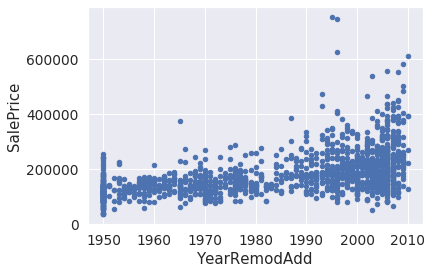

In [55]:
train.plot(kind="scatter", y="SalePrice", x="YearRemodAdd")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


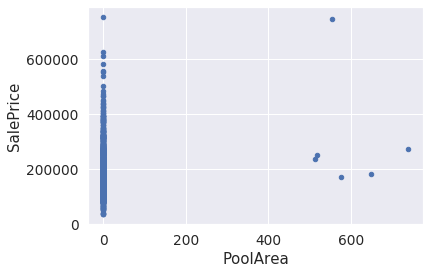

In [59]:
train.plot(kind="scatter", y="SalePrice", x="PoolArea")

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

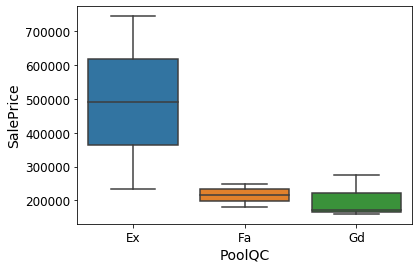

In [9]:
# train.plot(kind="scatter", y="SalePrice", x="PoolQC")
import seaborn as sns
sns.boxplot(x='PoolQC', y="SalePrice", data=train)
train['PoolQC'].describe()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


82

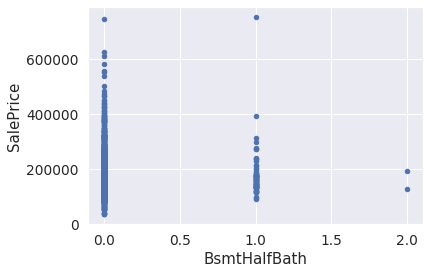

In [67]:

train.plot(kind="scatter", y="SalePrice", x="BsmtHalfBath")
(train['BsmtHalfBath']>0).sum()

2

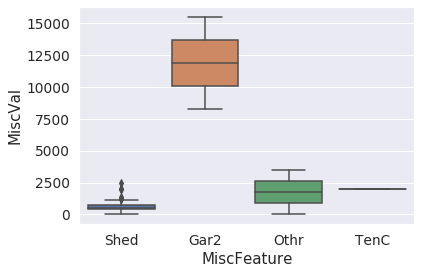

In [70]:
sns.boxplot(x='MiscFeature', y="MiscVal", data=train)
(train['MiscFeature']=='Gar2').sum()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


26

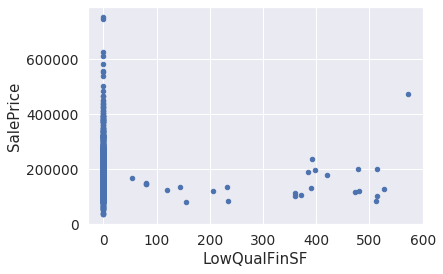

In [73]:
train.plot(kind="scatter", y="SalePrice", x="LowQualFinSF")
(train['LowQualFinSF']>0).sum()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


116

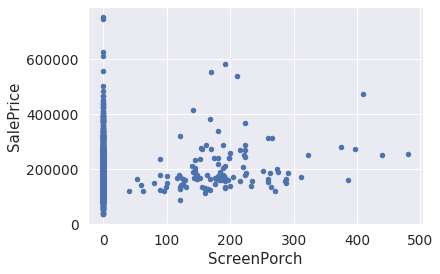

In [75]:
train.plot(kind="scatter", y="SalePrice", x="ScreenPorch")
(train['ScreenPorch']>0).sum()

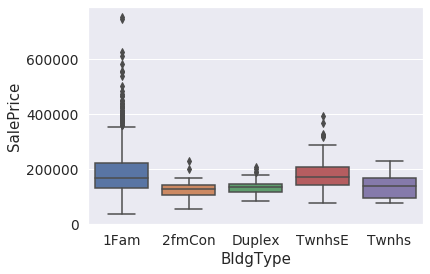

In [76]:
sns.boxplot(x='BldgType', y="SalePrice", data=train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


24

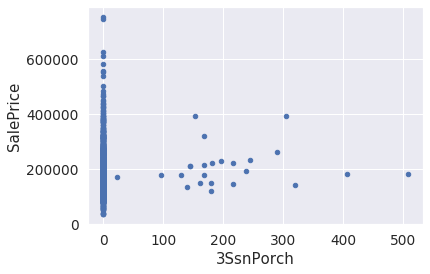

In [77]:
train.plot(kind="scatter", y="SalePrice", x="3SsnPorch")
(train['3SsnPorch']>0).sum()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


167

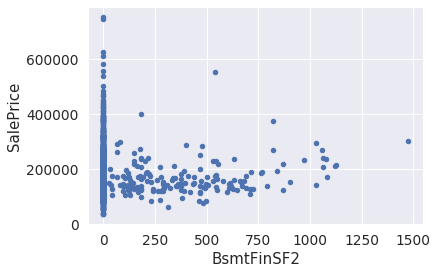

In [79]:
train.plot(kind="scatter", y="SalePrice", x="BsmtFinSF2")
(train['BsmtFinSF2']>0).sum()

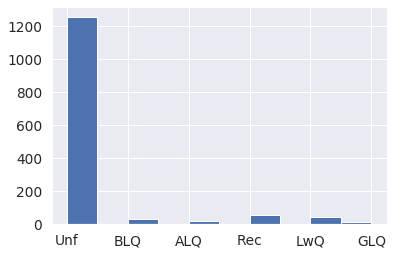

In [80]:
train['BsmtFinType2'].hist()

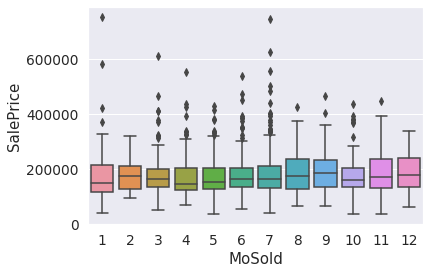

In [87]:
sns.boxplot(x='MoSold', y="SalePrice", data=train)
# train.plot(kind="scatter", y="SalePrice", x="MoSold")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


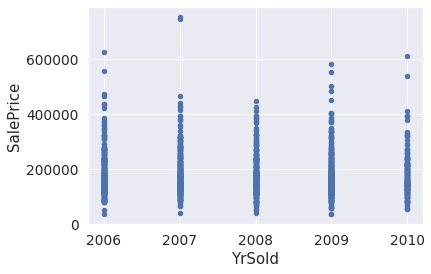

In [83]:
train.plot(kind="scatter", y="SalePrice", x="YrSold")

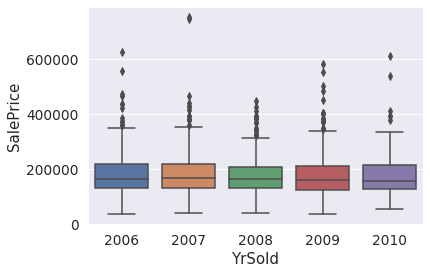

In [84]:
sns.boxplot(x='YrSold', y="SalePrice", data=train)

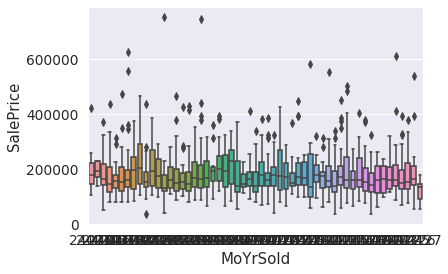

In [85]:
train['MoYrSold'] = 12*train['YrSold'] + train['MoSold']
sns.boxplot(x='MoYrSold', y="SalePrice", data=train)

In [86]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
MoYrSold        -0.021291
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr

37

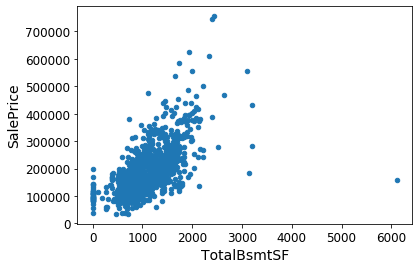

In [7]:
train.plot(kind="scatter", y="SalePrice", x="TotalBsmtSF")
(train['TotalBsmtSF']==0).sum()

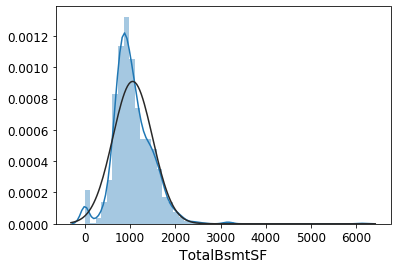

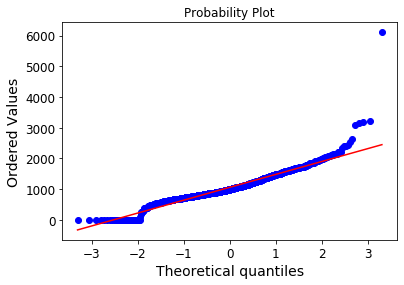

In [12]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [13]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [14]:
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

/home/marek/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


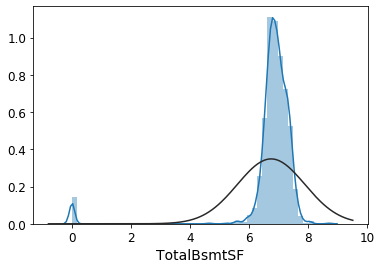

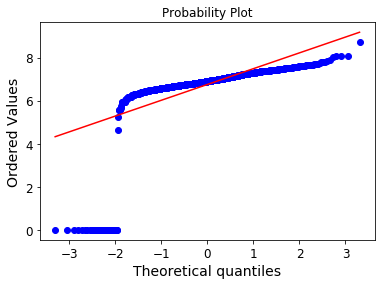

In [15]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

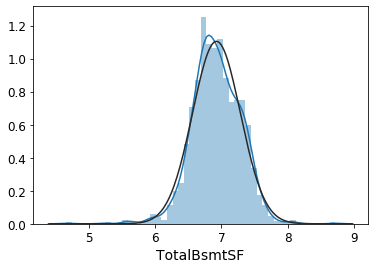

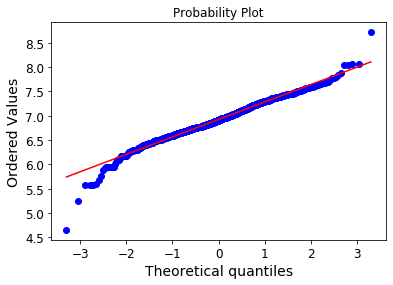

In [16]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

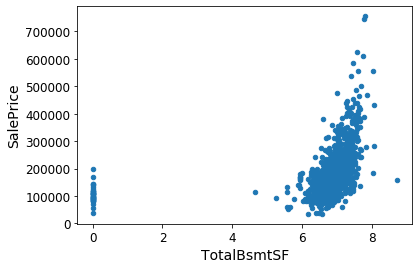

In [17]:
train.plot(kind="scatter", y="SalePrice", x="TotalBsmtSF")

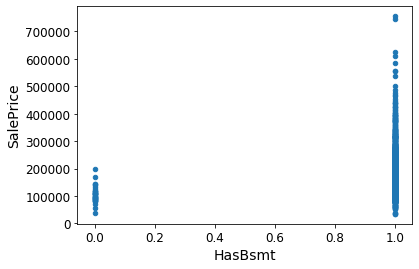

In [18]:
train.plot(kind="scatter", y="SalePrice", x="HasBsmt")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


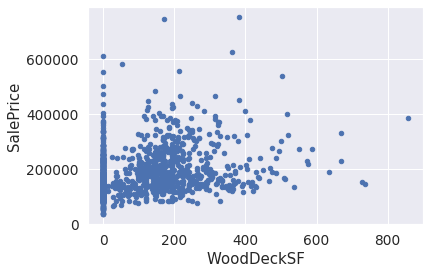

In [89]:
train.plot(kind="scatter", y="SalePrice", x="WoodDeckSF")

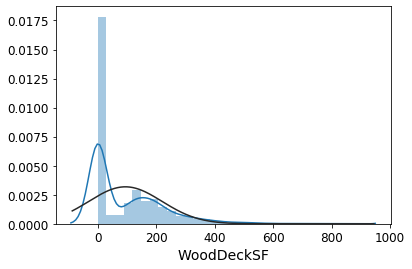

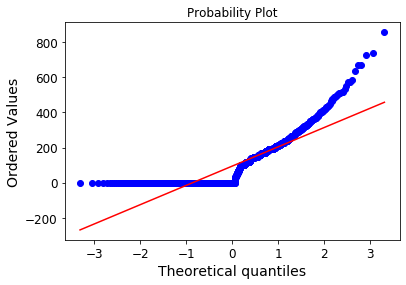

In [19]:
sns.distplot(train['WoodDeckSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['WoodDeckSF'], plot=plt)

In [20]:
train['HasWoodDeck'] = pd.Series(len(train['WoodDeckSF']), index=train.index)
train['HasWoodDeck'] = 0 
train.loc[train['WoodDeckSF']>0,'HasWoodDeck'] = 1

In [21]:
train.loc[train['HasWoodDeck']==1,'WoodDeckSF'] = np.log(train['WoodDeckSF'])

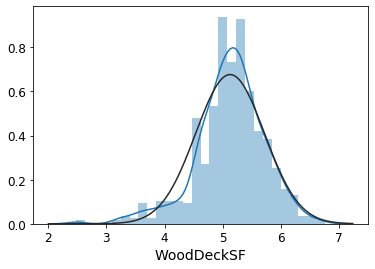

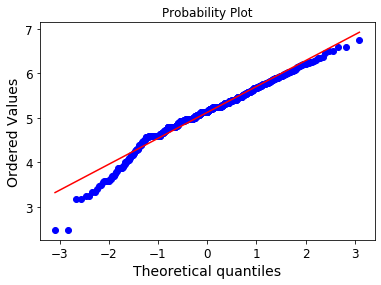

In [22]:
sns.distplot(train[train['WoodDeckSF']>0]['WoodDeckSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['WoodDeckSF']>0]['WoodDeckSF'], plot=plt)

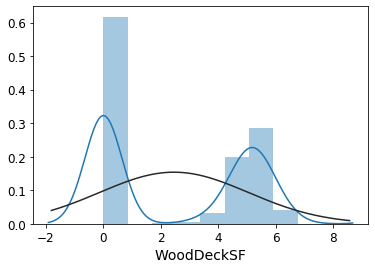

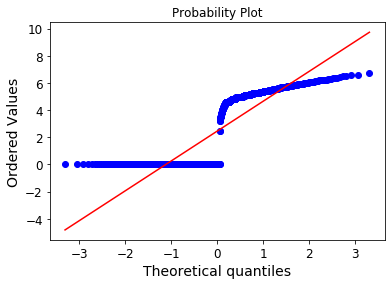

In [23]:
sns.distplot(train['WoodDeckSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['WoodDeckSF'], plot=plt)

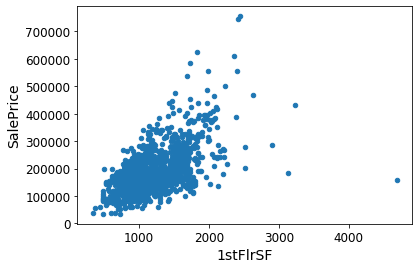

In [25]:
train.plot(kind="scatter", y="SalePrice", x="1stFlrSF")

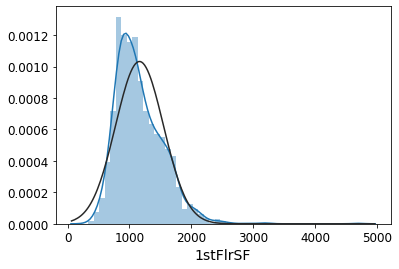

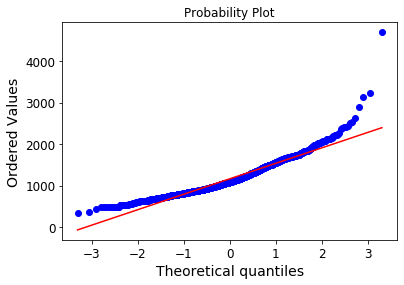

In [26]:
sns.distplot(train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)

In [27]:
train['1stFlrSF'] = np.log(train['1stFlrSF'])

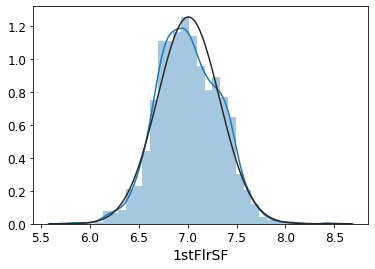

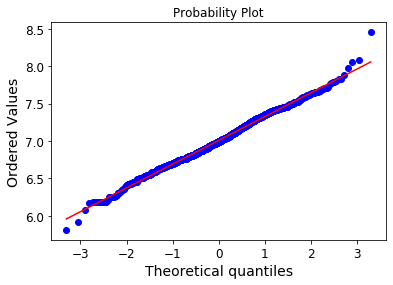

In [28]:
sns.distplot(train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)

467

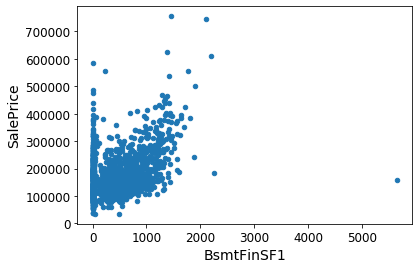

In [35]:
train.plot(kind="scatter", y="SalePrice", x="BsmtFinSF1")
(train['BsmtFinSF1']==0).sum()

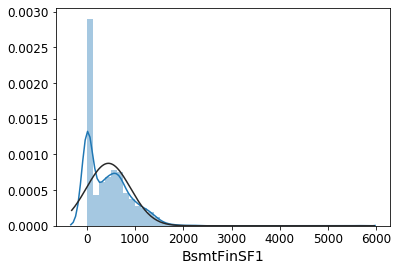

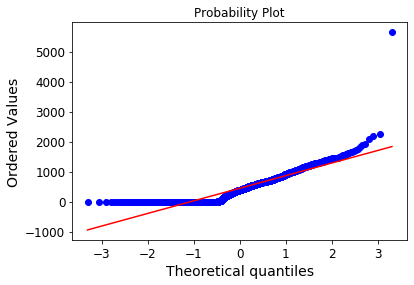

In [36]:
sns.distplot(train['BsmtFinSF1'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['BsmtFinSF1'], plot=plt)

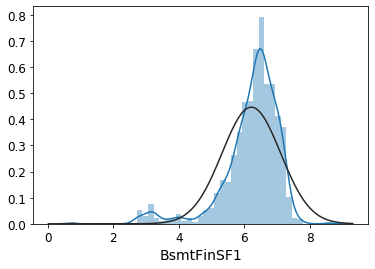

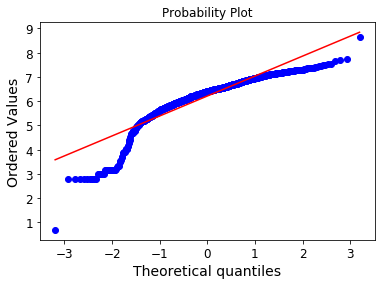

In [37]:
train['HasBsmtFin'] = pd.Series(len(train['BsmtFinSF1']), index=train.index)
train['HasBsmtFin'] = 0 
train.loc[train['BsmtFinSF1']>0,'HasBsmtFin'] = 1
train.loc[train['HasBsmtFin']==1,'BsmtFinSF1'] = np.log(train['BsmtFinSF1'])

sns.distplot(train[train['BsmtFinSF1']>0]['BsmtFinSF1'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['BsmtFinSF1']>0]['BsmtFinSF1'], plot=plt)

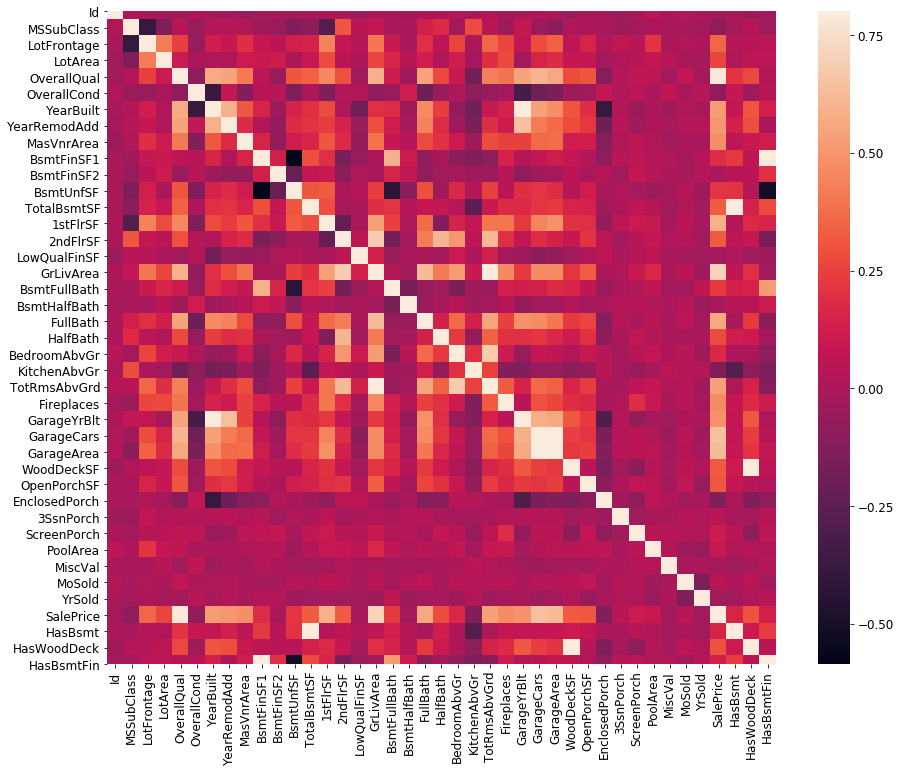

In [38]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

In [98]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.322128
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HasWoodDeck      0.298046
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
MoYrSold        -0.021291
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorc

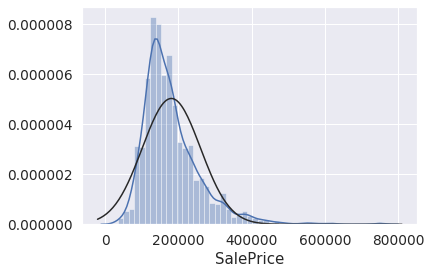

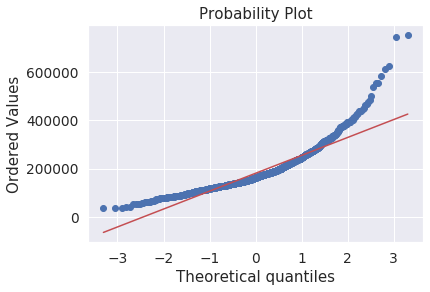

In [56]:
from scipy.stats import norm
from scipy import stats

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

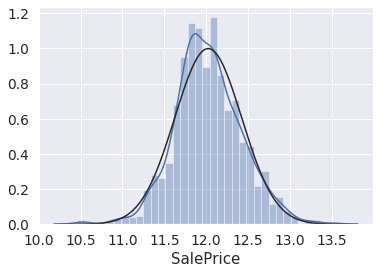

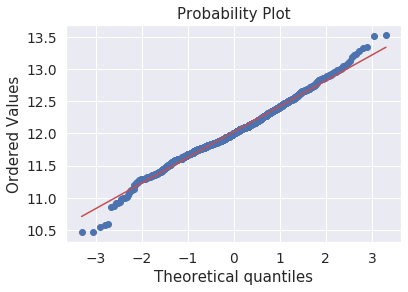

In [12]:
train['SalePrice'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

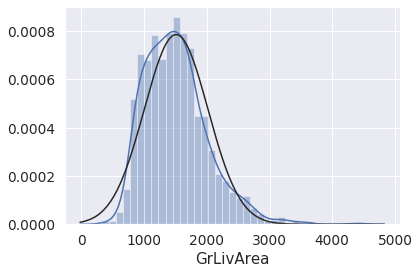

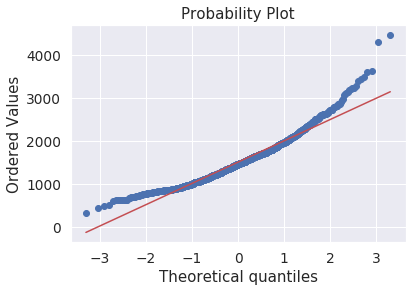

In [57]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

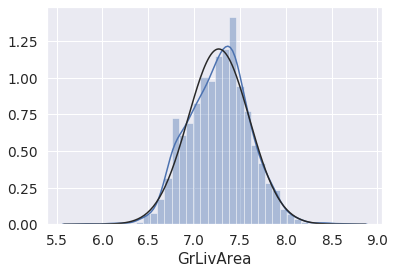

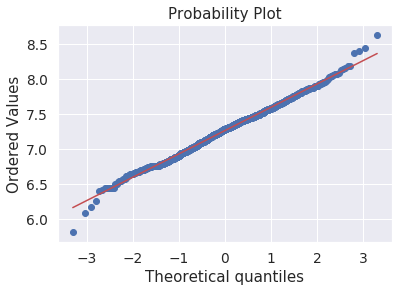

In [17]:
train['GrLivArea'] = np.log(train['GrLivArea'])

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

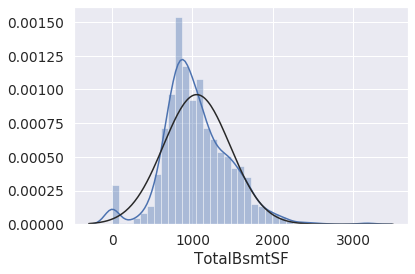

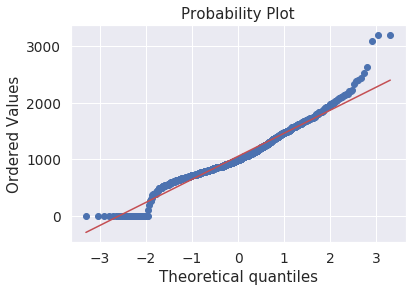

In [58]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

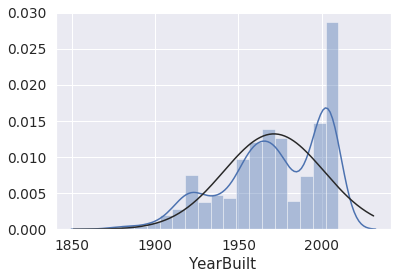

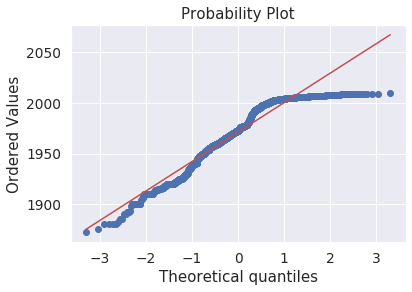

In [22]:

sns.distplot(train['YearBuilt'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['YearBuilt'], plot=plt)

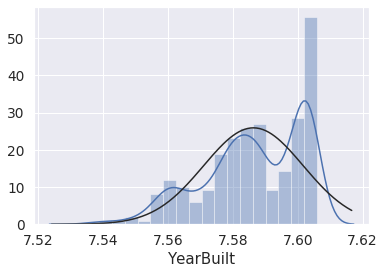

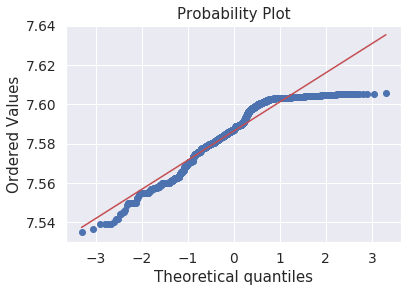

In [24]:
temp = np.log(train['YearBuilt'])

sns.distplot(temp, fit=norm);
fig = plt.figure()
res = stats.probplot(temp, plot=plt)

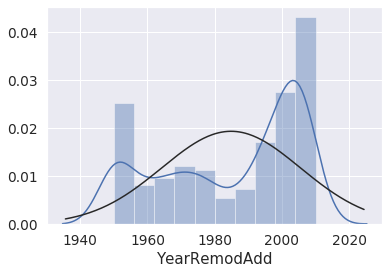

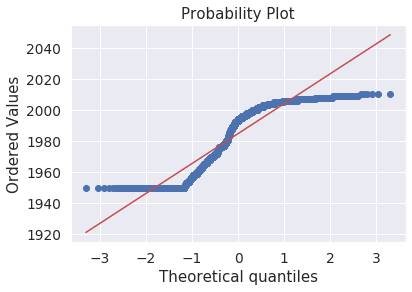

In [26]:
sns.distplot(train['YearRemodAdd'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['YearRemodAdd'], plot=plt)


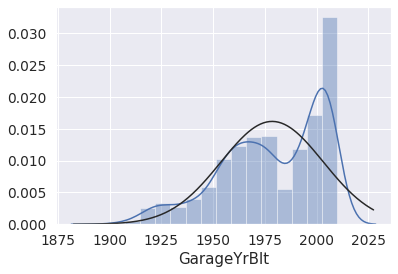

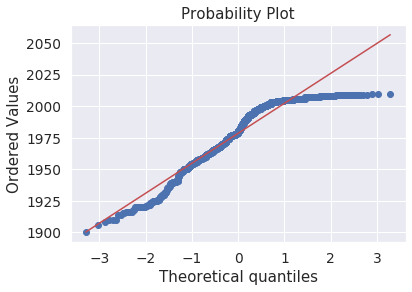

In [31]:
temp = train['GarageYrBlt']
# temp.dropna()
temp = train['GarageYrBlt'].drop(train['GarageYrBlt'].loc[train['GarageYrBlt'].isnull()].index)
sns.distplot(temp, fit=norm);
fig = plt.figure()
res = stats.probplot(temp, plot=plt)


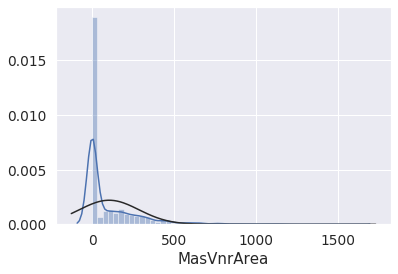

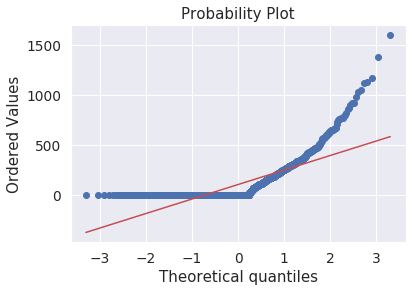

In [33]:
temp = train['MasVnrArea']
# temp.dropna()
temp = train['MasVnrArea'].drop(train['MasVnrArea'].loc[train['MasVnrArea'].isnull()].index)
sns.distplot(temp, fit=norm);
fig = plt.figure()
res = stats.probplot(temp, plot=plt)

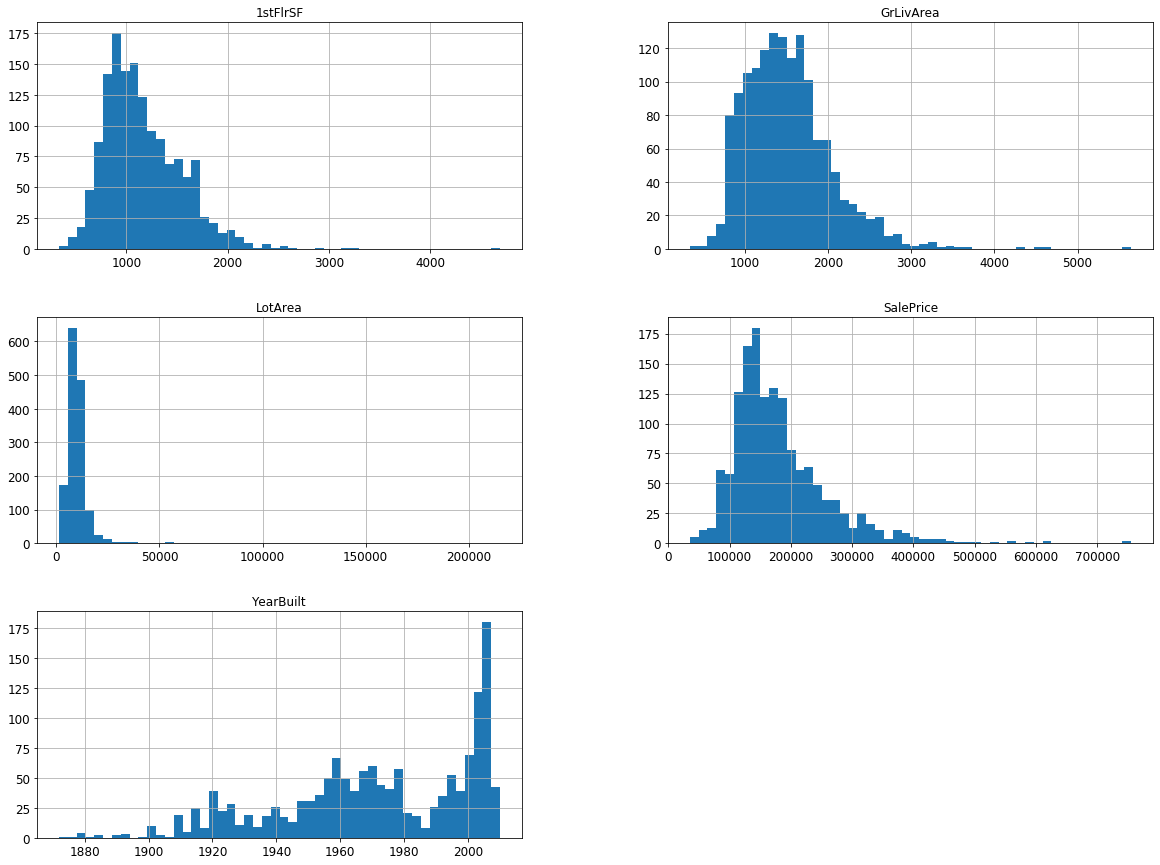

In [5]:
att = ['GrLivArea', 'LotArea', 'YearBuilt', '1stFlrSF', 'SalePrice']
train[att].describe()
import matplotlib.pyplot as plt
train[att].hist(bins=50, figsize=(20,15))
plt.show()

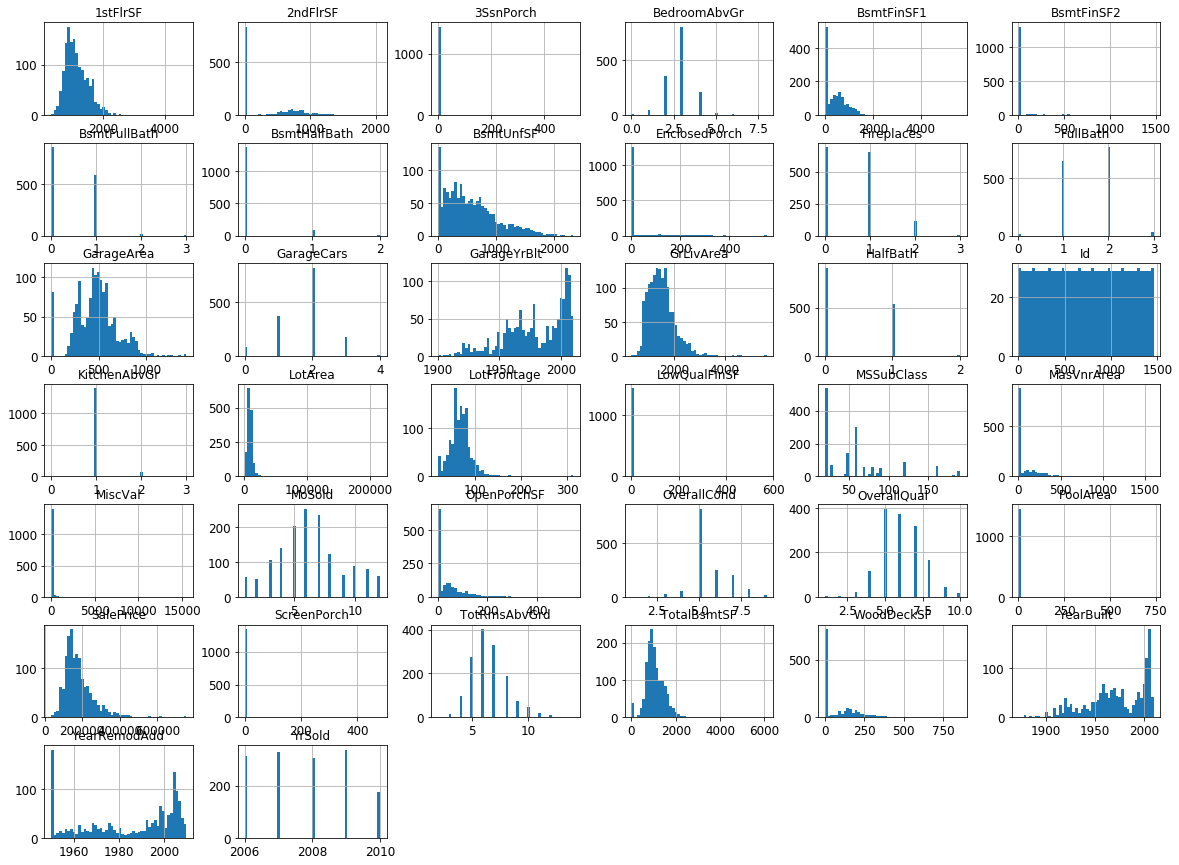

In [8]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

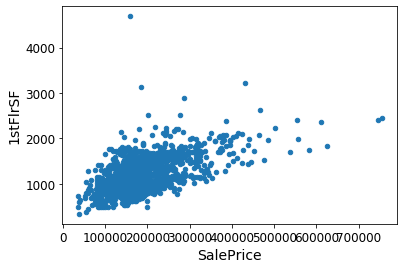

In [9]:
train.plot(kind="scatter", x="SalePrice", y="1stFlrSF")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67a6e71050>,
      dtype=object)

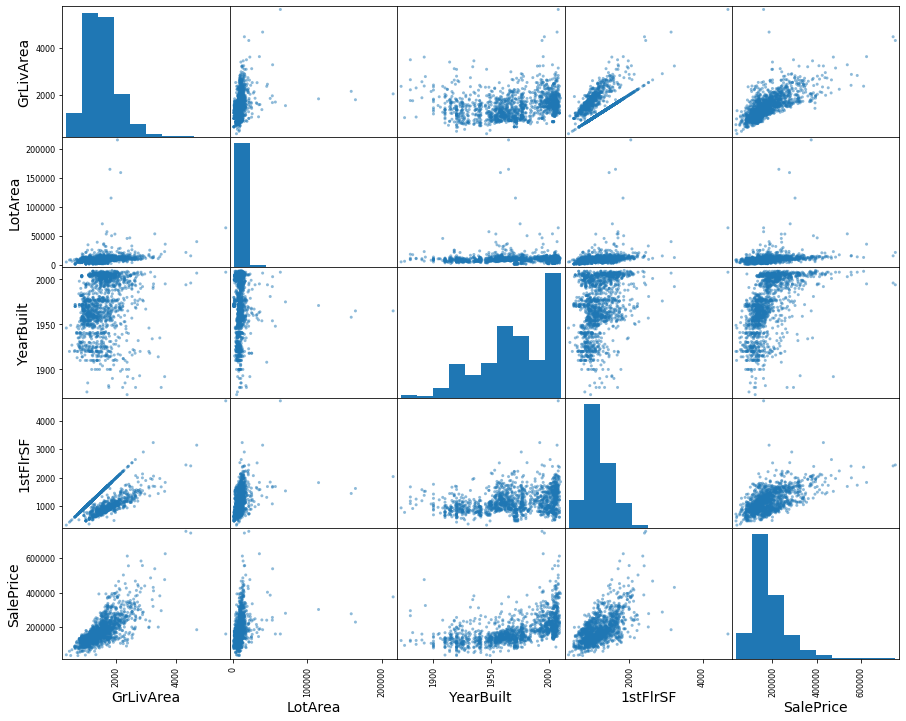

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(train[att], figsize=(15, 12))

In [11]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f679f65b650>,
      dtype=object)

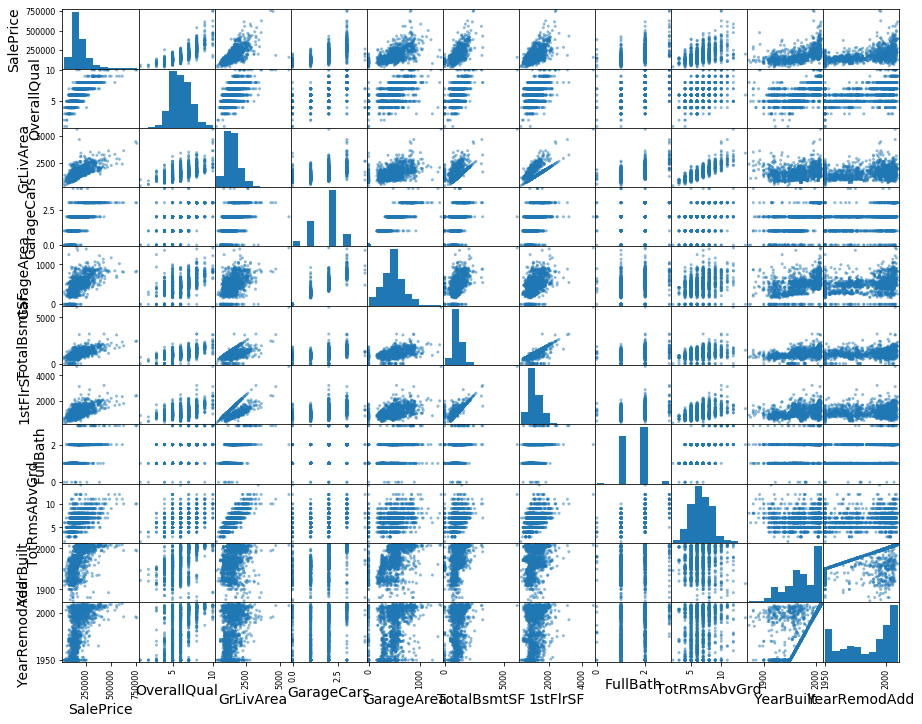

In [14]:
att2 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
        'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

from pandas.plotting import scatter_matrix

scatter_matrix(train[att2], figsize=(15, 12))

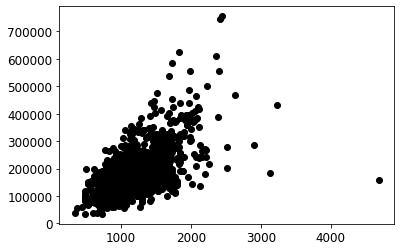

In [73]:
plt.plot(train['1stFlrSF'], train['SalePrice'],'ko')

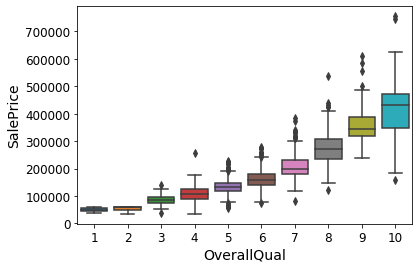

In [72]:
import seaborn as sns
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

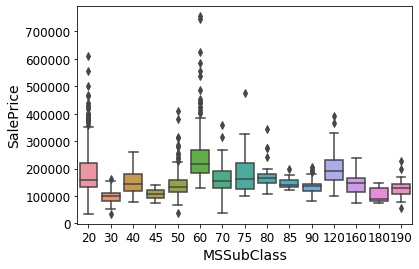

In [74]:
import seaborn as sns
sns.boxplot(x='MSSubClass', y="SalePrice", data=train)

0
4


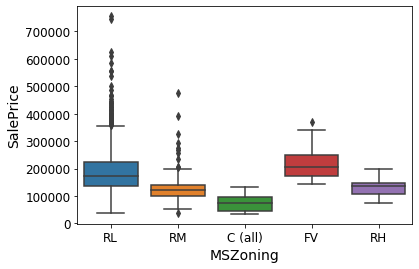

In [39]:
import seaborn as sns
att = 'MSZoning'
sns.boxplot(x=att, y="SalePrice", data=train)
print(train[att].isnull().sum())
print(test[att].isnull().sum())

0
4


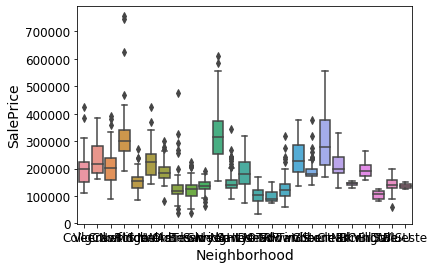

In [40]:
import seaborn as sns
sns.boxplot(x='Neighborhood', y="SalePrice", data=train)
print(train[att].isnull().sum())
print(test[att].isnull().sum())

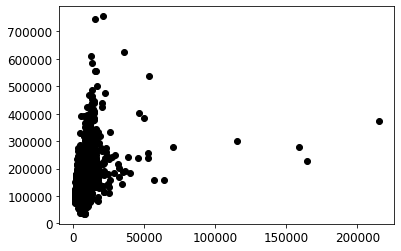

In [77]:
plt.plot(train['LotArea'], train['SalePrice'],'ko')

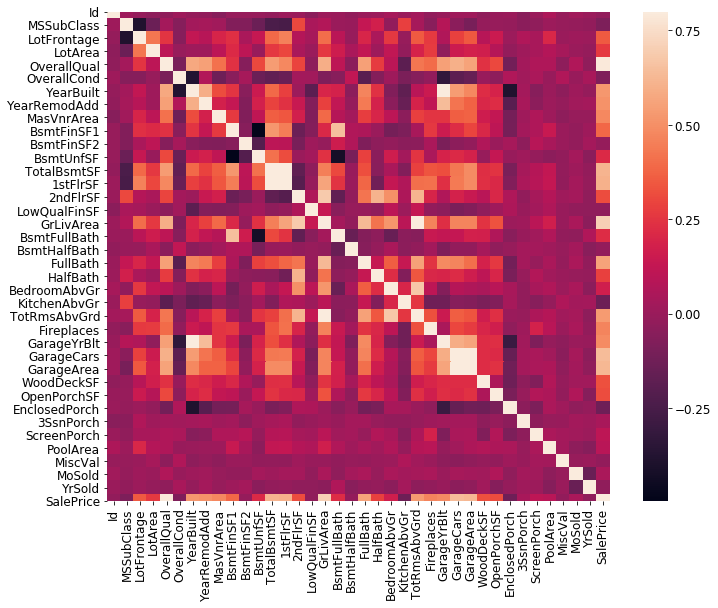

In [80]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

37
44


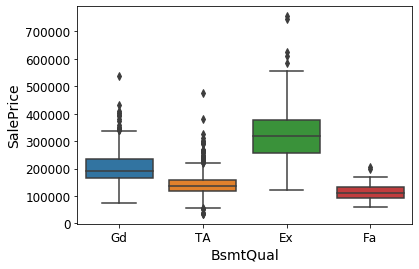

In [66]:
att = 'BsmtQual'
sns.boxplot(x=att, y="SalePrice", data=train)
print(train[att].isnull().sum())
print(test[att].isnull().sum())

In [69]:
train['BsmtQual'].fillna('NB', inplace=True)
test['BsmtQual'].fillna('NB', inplace=True)

0
0


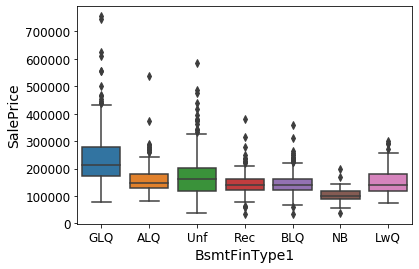

In [87]:
att = 'BsmtFinType1'
sns.boxplot(x=att, y="SalePrice", data=train)
print(train[att].isnull().sum())
print(test[att].isnull().sum())

In [86]:
train['BsmtFinType1'].fillna('NB', inplace=True)
test['BsmtFinType1'].fillna('NB', inplace=True)

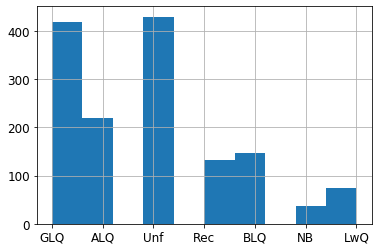

In [88]:
train['BsmtFinType1'].hist()

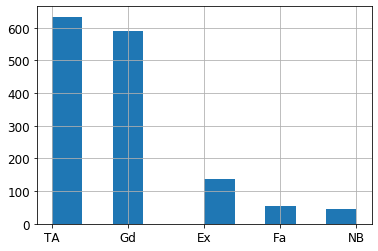

In [73]:
test['BsmtQual'].hist()

0
0


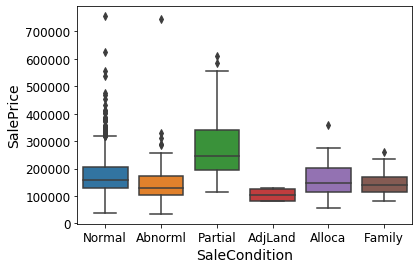

In [118]:
att = 'SaleCondition'
sns.boxplot(x=att, y="SalePrice", data=train)
print(train[att].isnull().sum())
print(test[att].isnull().sum())

In [116]:
test[test['SaleType'].isnull()==True]['SaleCondition']

1029    Normal
Name: SaleCondition, dtype: object

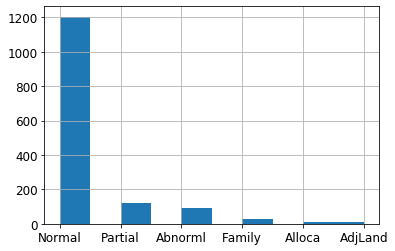

In [119]:
test['SaleCondition'].hist()